In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import glob
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

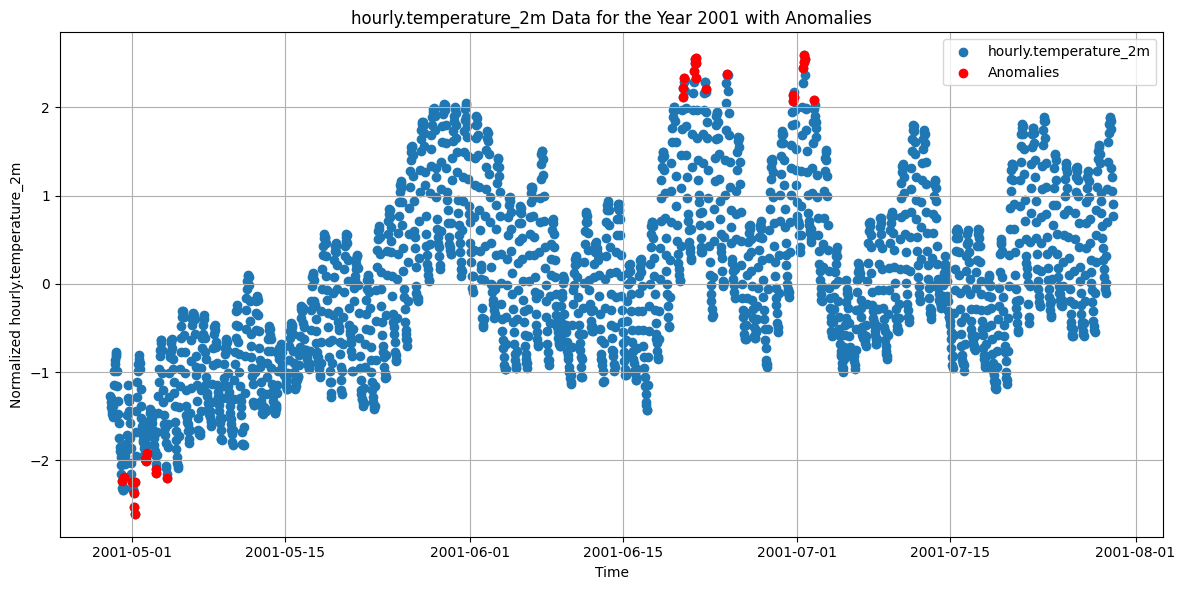

Anomalies for the 2001:
                     hourly.temperature_2m
hourly.time                               
2001-04-30 02:00:00              -2.232959
2001-04-30 07:00:00              -2.188307
2001-05-01 00:00:00              -2.247843
2001-05-01 04:00:00              -2.366914
2001-05-01 05:00:00              -2.530638
2001-05-01 06:00:00              -2.605058
2001-05-01 07:00:00              -2.247843
2001-05-02 05:00:00              -1.979931
2001-05-02 06:00:00              -1.994815
2001-05-02 07:00:00              -2.009699
2001-05-02 09:00:00              -1.920396
2001-05-03 05:00:00              -2.099003
2001-05-03 06:00:00              -2.143655
2001-05-04 06:00:00              -2.203191
2001-06-20 12:00:00               2.113159
2001-06-20 13:00:00               2.217347
2001-06-20 15:00:00               2.336419
2001-06-21 13:00:00               2.410838
2001-06-21 14:00:00               2.500142
2001-06-21 15:00:00               2.544794
2001-06-21 16:00:00           

In [5]:
pd2015 = pd.read_csv('OUTPUT/fw_4.csv')


var = 'hourly.temperature_2m'
temperature_df = pd2015[['hourly.time', f'{var}']]

year = '2001'

temperature_df['hourly.time'] = pd.to_datetime(temperature_df['hourly.time'])
temperature_df.set_index('hourly.time', inplace=True)


scaler = StandardScaler()
temperature_df[f'{var}'] = scaler.fit_transform(temperature_df[f'{var}'].values.reshape(-1, 1))

k = 5
knn = NearestNeighbors(n_neighbors=k)
distances, _ = knn.fit(temperature_df[f'{var}'].values.reshape(-1, 1)).kneighbors(temperature_df[f'{var}'].values.reshape(-1, 1))
mean_distances = distances.mean(axis=1)
z_scores = (mean_distances - mean_distances.mean()) / mean_distances.std()
anomaly_threshold = 2.0
anomalies = temperature_df[z_scores > anomaly_threshold]


plt.figure(figsize=(12, 6))
plt.scatter(temperature_df.index, temperature_df[f'{var}'], label=f'{var}')
plt.scatter(anomalies.index, anomalies[f'{var}'], c='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel(f'Normalized {var}')
plt.title(f'{var} Data for the Year {year} with Anomalies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'Anomalies for the {year}:')
print(anomalies)

In [7]:
csv_files = glob.glob('OUTPUT/*.csv')
print(csv_files)

['CACHE_3Months_copy/batch_1.csv', 'CACHE_3Months_copy/batch_0.csv', 'CACHE_3Months_copy/batch_11.csv', 'CACHE_3Months_copy/batch_13.csv', 'CACHE_3Months_copy/batch_10.csv', 'CACHE_3Months_copy/batch_6.csv', 'CACHE_3Months_copy/batch_17.csv', 'CACHE_3Months_copy/batch_9.csv', 'CACHE_3Months_copy/batch_16.csv', 'CACHE_3Months_copy/batch_8.csv', 'CACHE_3Months_copy/batch_12.csv', 'CACHE_3Months_copy/batch_14.csv', 'CACHE_3Months_copy/batch_15.csv', 'CACHE_3Months_copy/batch_2.csv', 'CACHE_3Months_copy/batch_7.csv', 'CACHE_3Months_copy/batch_4.csv', 'CACHE_3Months_copy/batch_5.csv', 'CACHE_3Months_copy/batch_3.csv']


In [ ]:
pd2015 = pd.read_csv('OUTPUT/fw_4.csv')


var = 'hourly.temperature_2m'
temperature_df = pd2015[['hourly.time', f'{var}']]

year = '2001'

temperature_df['hourly.time'] = pd.to_datetime(temperature_df['hourly.time'])
temperature_df.set_index('hourly.time', inplace=True)


scaler = StandardScaler()
temperature_df[f'{var}'] = scaler.fit_transform(temperature_df[f'{var}'].values.reshape(-1, 1))

k = 5
knn = NearestNeighbors(n_neighbors=k)
distances, _ = knn.fit(temperature_df[f'{var}'].values.reshape(-1, 1)).kneighbors(temperature_df[f'{var}'].values.reshape(-1, 1))
mean_distances = distances.mean(axis=1)
z_scores = (mean_distances - mean_distances.mean()) / mean_distances.std()
anomaly_threshold = 2.0
anomalies = temperature_df[z_scores > anomaly_threshold]


plt.figure(figsize=(12, 6))
plt.scatter(temperature_df.index, temperature_df[f'{var}'], label=f'{var}')
plt.scatter(anomalies.index, anomalies[f'{var}'], c='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel(f'Normalized {var}')
plt.title(f'{var} Data for the Year {year} with Anomalies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'Anomalies for the {year}:')
print(anomalies)